In [5]:
#Import standard libraries
import numpy as np
import scipy as sp
from skewt_scipy.skewt import skewt
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta
from plotly.subplots import make_subplots
import seaborn as sns

#Import custom libraries
from plottingUtils import plot_log_candlesticks, random_color, hist_with_fit
from dataUtils import dr, estimate_params, fit_distribution, estimate_params_dist

In [6]:
#List of products to be analyzed
indices = ["^GSPC","^STOXX50E",  "^AEX","^DJI", "^IXIC"]
crypto = ["BTC-USD", "USDT-USD", "ETH-USD", "BNB-USD", "SOL-USD", "STETH-USD", "XRP-USD", "USDC-USD", "ADA-USD", "DOGE-USD", "AVAX-USD", "SHIB-USD" ]
stocks = ["NVDA", "ASML", "AMD", "TSM", "APH", "MSFT", "AMZN", "TXN", "ADI", "QCOM", "FLOW.AS"]
etfs = ["IUSA.DE", "VUSA.DE", "EXW1.DE", "2B7K.DE", "VGWL.DE", "EUNL.DE", "H4ZJ.DE", "EXXT.DE", "6AQQ.DE", "LYMS.DE", "XNAS.DE",
        "2B76.DE", "XDWT.DE", "XAIX.DE"]#, "NANC", "KRUZ",]
quantum = ["QBTS", "QUBT", "ARQQ", "QMCO", "IONQ", "RGTI", "HON", "INTC" ]#NVDA, MSFT
commodities = ["GC=F", "SI=F", "CL=F", "NG=F", "HG=F", "ZC=F", "ZW=F", "ZS=F", "ZL=F", "ZM=F"]
products = indices + etfs #+ stocks #+ crypto 

# Fetch the historical data for a certain period and interval
df = yf.download(products, period="3y", interval="1d")

#Plot the candlesticks with a logarithmic scale
plot_log_candlesticks(df, products, remove_gaps=False, normalize=True, log_scale=True)


[*********************100%%**********************]  19 of 19 completed


In [7]:
#Find the relative increase/decrease beween the close price of neighboring intervals
df = dr(df, products)

755 is too large
755 is too large
755 is too large


In [8]:
#Analyze the relative increse/decrease data and estimate the geometruc brownian motion parameters
#Using these parameters an estimate of the expected return, the risk and the risk/expected return ratio is made
data = estimate_params(df, products)

def color_dataframe(data):
    #Display the results in a table with color coding
    #TODO: Refactor this into a function
    cm_green = sns.light_palette("green", as_cmap=True)
    cm_red_pos = sns.light_palette("red", as_cmap=True)
    cm_red_neg = sns.light_palette("darkred", as_cmap=True, reverse=True)
    data_styled = data.style.background_gradient(cmap=cm_red_pos, vmin = 0, subset=["std"])
    for green_index in ["mean", "mean-std^2/2", "mean-intrest (E)"]:
        data_styled = data_styled.background_gradient(**{'cmap': cm_green, "vmin": 0}, subset=[green_index])
    for red_index in ["risk (R)", "R/E"]:
        data_styled = data_styled.background_gradient(**{'cmap': cm_red_neg, "vmax":0}, subset=[red_index])
    display(data_styled)

color_dataframe(data)

by parts: [-4.15295800e-03  2.77961612e-11]
by parts: [-4.31054083e-03  1.52746941e-11]
by parts: [-3.93037324e-03  4.06779369e-11]
by parts: [-3.56129140e-03  2.82757401e-10]
by parts: [-5.61122417e-03  1.14091728e-14]
by parts: [-3.48765046e-03  2.03741463e-10]
by parts: [-3.48480645e-03  2.17273071e-10]
by parts: [-4.29916302e-03  1.61312493e-11]
by parts: [-3.35672157e-03  1.14290491e-09]
by parts: [-3.22529621e-03  4.51510698e-09]
by parts: [-3.26695476e-03  2.13372953e-09]
by parts: [-3.28275576e-03  2.33830352e-09]
by parts: [-4.71081771e-03  1.01363747e-12]
by parts: [-4.68950523e-03  1.09383329e-12]
by parts: [-4.70198980e-03  1.00911458e-12]
by parts: [-4.69291426e-03  1.08074555e-12]
by parts: [-5.10496514e-03  9.46569198e-14]
by parts: [-4.99296525e-03  6.47509991e-14]
by parts: [-4.60118673e-03  2.24168448e-12]


,mean,std,mean-std^2/2,risk (R),mean-intrest (E),R/E
^GSPC,0.000409,0.010914,0.000350,-0.004153,0.000261,-15.933633
^STOXX50E,0.000421,0.011323,0.000356,-0.004311,0.000268,-16.113775
^AEX,0.000363,0.010300,0.000310,-0.003930,0.000221,-17.754872
^DJI,0.000268,0.009258,0.000225,-0.003561,0.000136,-26.171769
^IXIC,0.000349,0.014497,0.000244,-0.005611,0.000155,-36.158924
IUSA.DE,0.000514,0.009371,0.000470,-0.003488,0.000381,-9.157826
VUSA.DE,0.000509,0.009358,0.000465,-0.003485,0.000376,-9.270821
EXW1.DE,0.000417,0.011291,0.000354,-0.004299,0.000265,-16.244646
2B7K.DE,0.000439,0.008953,0.000399,-0.003357,0.000310,-10.833853
VGWL.DE,0.000322,0.008481,0.000286,-0.003225,0.000197,-16.365866


In [9]:
#Code for fitting other distributions than normal distributions. 
#TODO: Refactor
#TODO: Add skew normal and skew t-distribution


dist1 = sp.stats.t
dist2 = skewt
dist3 = sp.stats.norm
dist4 = sp.stats.skewnorm
dist5 = sp.stats.cauchy
dist6 = sp.stats.skewcauchy

bounds1 = [(0,100), (-0.1, 0.1), (0,0.1)]
bounds2 = [(-2,2), (0, 100), (-0.1,0.1), (0, 0.1)]
bounds3 = [(-0.1,0.1), (-0.1, 0.1)]
bounds4 = [(-0.1,0.1), (-0.1,0.1), (-0.1, 0.1)]
bounds5 = [(-0.1, 0.1), (0,0.1)]
bounds6 = [(-1, 1), (-0.1,0.1), (0, 0.1)]

data_dist1 = estimate_params_dist(df, products, dist1, bounds1)
data_dist2 = estimate_params_dist(df, products, dist2, bounds2)
data_dist3 = estimate_params_dist(df, products, dist3, bounds3)
#color_dataframe(data)
#color_dataframe(data_dist1)
color_dataframe(data_dist2)
#color_dataframe(data_dist3)



# ticker = "NVDA"

# dr_data = df["dr"][ticker].dropna()

# res1, logL1 = fit_distribution(dist1, dr_data, bounds1)
# res2, logL2 = fit_distribution(dist2, dr_data, bounds2)
# res3, logL3 = fit_distribution(dist3, dr_data, bounds3)
# res4, logL4 = fit_distribution(dist4, dr_data, bounds4)
# res5, logL5 = fit_distribution(dist5, dr_data, bounds5)
# res6, logL6 = fit_distribution(dist6, dr_data, bounds6)
# print(dist1(*res1.params).__dir__())


# print(dist1.name, res1.params, logL1)
# print(dist2.name, res2.params, logL2)
# print(dist3.name, res3.params, logL3)
# print(dist4.name, res4.params, logL4)
# print(dist5.name, res5.params, logL5)
# print(dist6.name, res6.params, logL6)

# hist_with_fit(dr_data, [dist1], [bounds1])
# hist_with_fit(dr_data, [dist2], [bounds2])
# hist_with_fit(dr_data, [dist3], [bounds3])
# hist_with_fit(dr_data, [dist4], [bounds4])
# hist_with_fit(dr_data, [dist5], [bounds5])
# hist_with_fit(dr_data, [dist6], [bounds6])


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=5.295744158441543, loc=0.0005233278486319057, scale=0.008718811488717903) -2357.6046137981607
by parts: [-3.83604435e-03  7.51745317e-09]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=3.9738132538212465, loc=0.0007942820768675371, scale=0.008015714462723826) -2380.932668046109
by parts: [-3.63298672e-03  1.04545901e-08]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=4.227046306839003, loc=0.0006780485199882811, scale=0.007713796863960914) -2468.5582153480955
by parts: [-3.47394438e-03  1.75270740e-12]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=7.071713803102696, loc=0.00036007238714863283, scale=0.00769865735536027) -2481.38793770699
by parts: [-3.27680462e-03  2.22674443e-13]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=6.704256242478454, loc=0.0005483490911753846, scale=0.012209054284965265) -2135.717210602148
by parts: [-5.24681130e-03  4.24507947e-11]
FitParams(df=4.356584166765462, loc=0.0008802964700968088, scale=0.0071021075514330345) -2528.5312461061753
by parts: [-3.05465973e-03  1.16356216e-12]
FitParams(df=4.557006952310755, loc=0.0008877069278623833, scale=0.007184789722179553) -2527.906611040235
by parts: [-3.05466675e-03  1.72456939e-12]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=3.800698665947273, loc=0.0007947000306947038, scale=0.008002225180056319) -2408.466271727907
by parts: [-3.67706374e-03  1.47684269e-08]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=13.920884517874724, loc=0.0006342841645563835, scale=0.008087289920294762) -2548.369336206363
by parts: [-3.10712280e-03  1.11676459e-08]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=4.531283606866806, loc=0.0007029867721522712, scale=0.006422056689364236) -2610.914815481905
by parts: [-2.77567473e-03  2.59016193e-12]
FitParams(df=4.644516036910497, loc=0.0008131098534894258, scale=0.006760719391410588) -2578.1362244003008
by parts: [-2.87052107e-03  8.61723368e-13]
FitParams(df=5.000798133748622, loc=0.0007558667843355317, scale=0.006812520298542315) -2581.758852758978
by parts: [-2.87071443e-03  2.89832403e-12]
FitParams(df=5.322566161688206, loc=0.0008104699457887771, scale=0.010154115975005578) -2287.0437150782645
by parts: [-4.36791296e-03  1.37972224e-09]
FitParams(df=5.818875369996585, loc=0.0008327063111041858, scale=0.01028766940895037) -2291.2673599473624
by parts: [-4.34534061e-03  8.28298823e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=5.709080116994364, loc=0.0008623196224033093, scale=0.01027648548831587) -2289.3823903785146
by parts: [-4.34143503e-03  9.04058798e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=8.83391042993999, loc=0.0007932053334322996, scale=0.010877686145680115) -2289.929754999162
by parts: [-4.37225020e-03  5.60548019e-11]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=12.605590534572233, loc=0.0005108435363244208, scale=0.012028971612182707) -2241.6659077456898
by parts: [-4.85936321e-03  2.81496680e-11]
FitParams(df=9.112489586216071, loc=0.0008866148627023769, scale=0.011745794789855733) -2234.822422877441
by parts: [-4.69143795e-03  5.67680520e-11]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(df=11.176577430345667, loc=0.0007092685027104326, scale=0.01091561018527313) -2306.191018789767
by parts: [-4.33169683e-03  1.31143125e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.3177492817352267, df=9.179792011537364, loc=0.0029747158302504697, scale=0.009691143915782591) -2355.399066699645
by parts: [-3.90325894e-03  8.21014559e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_continuous_distns.py:7170: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.3911757672750666, df=3.4201912241403423, loc=0.0033754419693077936, scale=0.008018024231795094) -2383.7511668224333
by parts: [-3.92060415e-03  3.69663448e-13]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.5317868871620145, df=6.303961445982838, loc=0.004134710696492943, scale=0.008884663679639058) -2468.3879463468656
by parts: [-3.62630133e-03  3.95820944e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.2023458194173502, df=6.461298785084949, loc=0.0016626709204838582, scale=0.007687625665937794) -2482.225182870151
by parts: [-3.31655506e-03  2.53773192e-09]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.4912256957725441, df=10.738133530243841, loc=0.005539839395048819, scale=0.013717950100756401) -2135.204983586447
by parts: [-5.37340047e-03  4.41515566e-12]
FitParams(a=-0.5402389649935808, df=5.05882617249775, loc=0.004039864006208424, scale=0.00783693366381175) -2530.768397138295
by parts: [-3.23128741e-03  7.07804268e-14]
FitParams(a=-0.5041064672828823, df=3.924272697440045, loc=0.0038153053367676946, scale=0.007416383386417934) -2530.1991489928005
by parts: [-3.31469236e-03  8.70927043e-11]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_continuous_distns.py:7170: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.49707353421227124, df=4.033132237379897, loc=0.00407595588001464, scale=0.008586774935596658) -2410.5362441011102
by parts: [-3.93217963e-03  5.61553643e-09]
FitParams(a=-1.0124111555635429, df=12.388459537391466, loc=0.006272557959915547, scale=0.009639174560800405) -2554.436128404259
by parts: [-3.19872635e-03  3.02954899e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.6583915232417349, df=4.054274818815643, loc=0.004008598584413315, scale=0.006915485633816556) -2614.2058042187095
by parts: [-3.05771816e-03  2.81615996e-11]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.7034531897070817, df=7.639451105486199, loc=0.004672240420058023, scale=0.008177647449457327) -2578.7489679071123
by parts: [-3.02940228e-03  3.37187778e-09]
FitParams(a=-0.9644683493405313, df=10.148351731402986, loc=0.005784013162658, scale=0.00900690133989696) -2579.9369011189683
by parts: [-3.09282249e-03  1.56386019e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.18102733092969817, df=4.796136840900643, loc=0.0023793141099655965, scale=0.010063884528941584) -2287.229188737281
by parts: [-4.45695493e-03  1.21541795e-09]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.38553484653080844, df=9.00317820638223, loc=0.004218205722596635, scale=0.011353081312661752) -2290.454271991334
by parts: [-4.44774016e-03  1.40137650e-12]
FitParams(a=-0.37249665841035423, df=6.52858523203918, loc=0.004076114916280641, scale=0.010877571228688456) -2290.0259686360773
by parts: [-4.45454908e-03  2.25833624e-10]
FitParams(a=-0.30948177708581387, df=5.688098624955015, loc=0.0035148934592828473, scale=0.010512375356257578) -2292.0497557578765
by parts: [-4.44609850e-03  4.93046755e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.5720977647022043, df=8.226100324750146, loc=0.005802337090846573, scale=0.012478464646495917) -2244.4087252284153
by parts: [-4.91579007e-03  1.58402831e-12]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.5578812032171389, df=20.060997799757157, loc=0.006253329704097193, scale=0.013599033851028406) -2230.7852914812347
by parts: [-4.84131868e-03  1.58022738e-12]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(a=-0.6142301773293646, df=16.817968664291023, loc=0.005992181670378957, scale=0.012382075645825344) -2304.415773658693
by parts: [-4.43877116e-03  1.87570500e-11]
FitParams(loc=0.00040908857195475867, scale=0.010914048165796561) -2336.4691879180955
by parts: [-4.15295840e-03  2.77963885e-11]
FitParams(loc=0.0004205037861800886, scale=0.011323179122777492) -2327.0929360312934
by parts: [-4.31054075e-03  1.52748446e-11]
FitParams(loc=0.0006196495624924526, scale=0.010317294712747435) -2436.7078617394145


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



by parts: [-3.81394054e-03  3.03710532e-11]
FitParams(loc=0.0006093454641405316, scale=0.009507393209194491) -2459.5529409744604
by parts: [-3.49632665e-03  1.04653225e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide

c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(loc=0.0001788425063392607, scale=0.014738161474789659) -2122.141749787046
by parts: [-5.79120214e-03  1.32730449e-14]
FitParams(loc=0.0005136450572117765, scale=0.009371130157377672) -2500.158333441558
by parts: [-3.48764194e-03  2.03761098e-10]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide

c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(loc=0.0007118551256378503, scale=0.009407965035009458) -2501.0433166896028
by parts: [-3.40834933e-03  2.07696274e-10]
FitParams(loc=0.0006791276345776032, scale=0.01133195839765165) -2356.642721576101
by parts: [-4.18972203e-03  1.42035011e-11]


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



FitParams(loc=0.0005541097602715262, scale=0.009209707042484437) -2534.6368945165964
by parts: [-3.40403728e-03  4.53150983e-10]
FitParams(loc=0.0003219352845162099, scale=0.008481269511010558) -2576.8850121649402
by parts: [-3.22529332e-03  4.51518311e-09]
FitParams(loc=0.0004665939639010589, scale=0.008760674437622972) -2551.9597085695004
by parts: [-3.26695269e-03  2.13376645e-09]
FitParams(loc=5.753177177725277e-05, scale=0.008739084990237053) -2554.3910887258994


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



by parts: [-3.45800753e-03  2.06814706e-09]
FitParams(loc=0.0006311307223443884, scale=0.012582400086253262) -2270.6052972269317
by parts: [-4.71081816e-03  1.01364951e-12]
FitParams(loc=0.0006535541325685257, scale=0.012555905793339055) -2275.1827875796134
by parts: [-4.68950563e-03  1.09384612e-12]
FitParams(loc=0.0006529513915155535, scale=0.012586510418871997) -2273.310629045751
by parts: [-4.70198863e-03  1.00912893e-12]
FitParams(loc=0.000649947219088818, scale=0.012560123031451804) -2274.924490845671
by parts: [-4.69291492e-03  1.08076007e-12]
FitParams(loc=0.0003767927389669035, scale=0.013262001082265181) -2233.109469010025
by parts: [-5.10496559e-03  9.46556304e-14]
FitParams(loc=0.0005735195785540048, scale=0.01372688682936523) -2221.7127477332533


c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide

c:\Users\Julian\miniconda3\envs\financialProductAnalysis\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2357: RuntimeWarning:

overflow encountered in divide



by parts: [-5.19471653e-03  9.74591619e-15]
FitParams(loc=0.0007002246163193782, scale=0.01230652187471161) -2293.292154209911
by parts: [-4.56783076e-03  2.05457145e-12]


,mean,std,mean-std^2/2,risk (R),mean-intrest (E),R/E
^GSPC,0.000417,0.010656,0.000361,-0.003903,0.000272,-14.368784
^STOXX50E,0.000311,0.012060,0.000238,-0.003921,0.000150,-26.219620
^AEX,0.000332,0.010058,0.000281,-0.003626,0.000192,-18.841013
^DJI,0.000278,0.009147,0.000236,-0.003317,0.000147,-22.545876
^IXIC,0.000341,0.014291,0.000239,-0.005373,0.000150,-35.885961
IUSA.DE,0.000513,0.009441,0.000468,-0.003231,0.000380,-8.513198
VUSA.DE,0.000459,0.010045,0.000409,-0.003315,0.000320,-10.363813
EXW1.DE,0.000262,0.011477,0.000197,-0.003932,0.000108,-36.535629
2B7K.DE,0.000439,0.008762,0.000401,-0.003199,0.000312,-10.257581
VGWL.DE,0.000220,0.008946,0.000180,-0.003058,0.000091,-33.736071


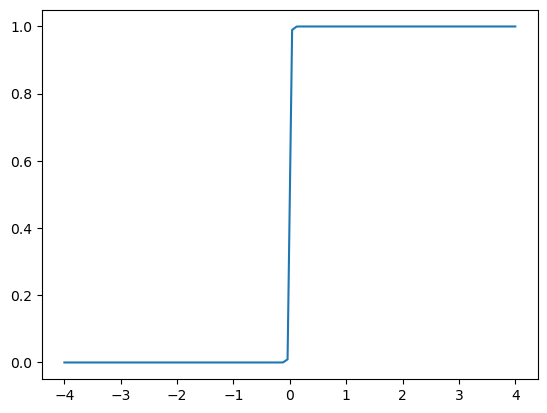

In [10]:
plt.plot(np.linspace(-4, 4, 100), dist1(*(4, 0.0005129971241070783, 0.01067148731316936)).cdf(np.linspace(-4, 4, 100)))